<a href="https://colab.research.google.com/github/mayuresh23sawant/flood-precautionary-bot/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.read_csv('customized_daily_rainfall_data.csv')

In [22]:
df.isna().sum()

Year            0
Month           0
Day             0
StationIndex    0
Station         0
Rainfall        0
datetime        0
dtype: int64

In [24]:
df.head()

,Year,Month,Day,StationIndex,Station,Rainfall,datetime
0,1970,1,1,16,Sylhet,0,1970-01-01
1,1970,1,2,16,Sylhet,0,1970-01-02
2,1970,1,3,16,Sylhet,0,1970-01-03
3,1970,1,4,16,Sylhet,0,1970-01-04
4,1970,1,5,16,Sylhet,0,1970-01-05


In [8]:
df=df.groupby(['Year','Month','Day']).max()

StationIndex Station  Rainfall
Year Month Day                                
1970 1     1              16  Sylhet         0
           2              16  Sylhet         0
           3              16  Sylhet         0
           4              16  Sylhet         0
           5              16  Sylhet         0

In [0]:
df=df.reset_index()

In [0]:
df1 = df[df.isna().any(axis=1)]

In [26]:
df.head()

,Rainfall,datetime
0,0,1970-01-01
1,0,1970-01-02
2,0,1970-01-03
3,0,1970-01-04
4,0,1970-01-05


In [0]:
df=df.dropna()

In [0]:
df['datetime']=pd.to_datetime(df[['Year','Month','Day']])

In [27]:
df=df.drop(['Station','StationIndex','Year','Month','Day'],axis=1)

KeyError: ignored

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


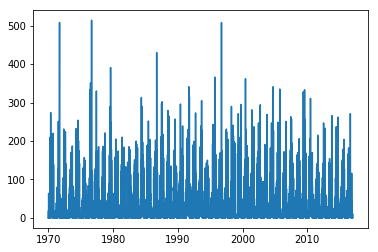

In [28]:
plt.plot(df['datetime'],df['Rainfall'])

In [0]:
df=df.rename(index=str, columns={"Rainfall": "y", "datetime": "ds"})


In [47]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
17527,2017-12-27
17528,2017-12-28
17529,2017-12-29
17530,2017-12-30
17531,2017-12-31


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
17527,2017-12-27,-1.701624,-46.834831,42.727820
17528,2017-12-28,-1.988034,-46.487980,39.578543
17529,2017-12-29,-2.621787,-46.388353,43.265704
17530,2017-12-30,-1.925312,-43.055128,40.831695
17531,2017-12-31,-0.632999,-40.022197,45.121198


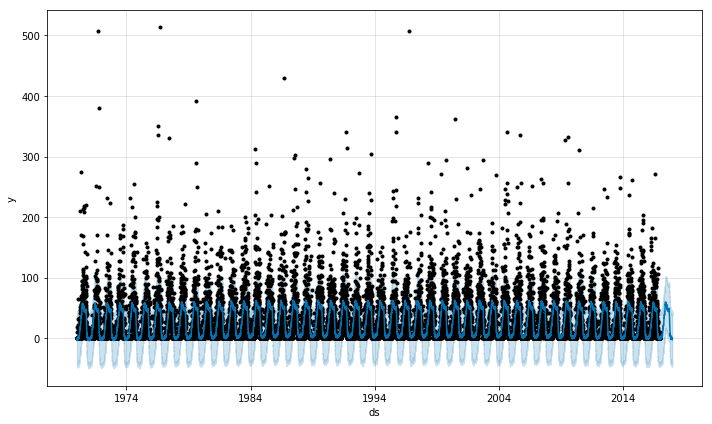

In [50]:
fig1 = m.plot(forecast)

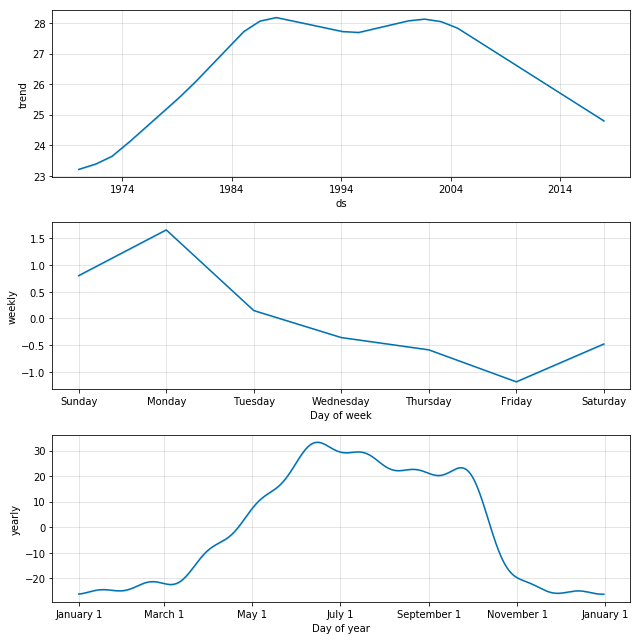

In [51]:
fig2 = m.plot_components(forecast)


In [52]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 87 forecasts with cutoffs between 1973-01-11 00:00:00 and 2016-01-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1973-01-12,-8.402350,-51.865969,38.446053,0,1973-01-11
1,1973-01-13,-4.438936,-52.054999,39.151272,20,1973-01-11
2,1973-01-14,-6.657990,-48.649373,41.021451,0,1973-01-11
3,1973-01-15,-6.525602,-50.512132,33.134375,5,1973-01-11
4,1973-01-16,-5.805528,-53.104741,39.721104,0,1973-01-11


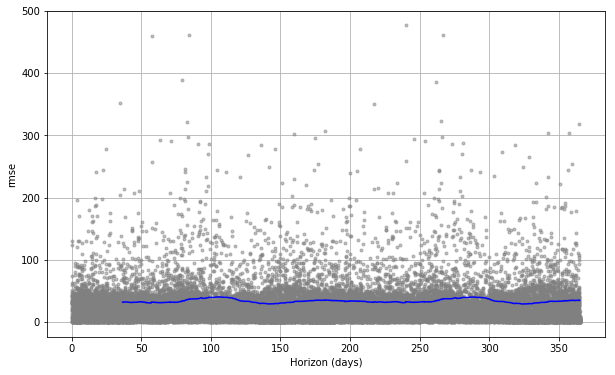

In [55]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv,metric='rmse')